# Project: Analyzing No-Show Medical Appointments in Brazil

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset comprises information from more than 100,000 medical appointments in Brazil and is collected to analyze whether patients show up for their appointments or not. Several factors as described below could be at play and the goal is to determine which of these factors influence a customer not showing up for his appointment. 

>These factors could be:

<li>Gender: Gender of the patient</li>
<li>ScheduledDay: Day on which the appointment was scheduled</li>
<li>AppointmentDay: Day on which the appointment was scheduled for</li>
<li>Age: Age of the patient</li>
<li>Neighbourhood: Location of the hospital</li>
<li>Scholarship: Is the patient enrolled in Brasilian welfare program "Bolsa Família"?</li>
<li>Hipertension: Does the patient have Hypertension?</li>
<li>Diabetes: Does the patient have Diabetes?</li>
<li>Alcoholism: Does the patient have Hypertension?</li>
<li>Handcap:  Does the patient have a handicap?</li>
<li>SMS_received: Did the patient receive a SMS message notifying / reminding them of the appointment?</li>

<b>Questions we might ask as to why a patient did or did not show up for the appointment could be.</b>
>
<li>Are men or women more likely to show or not show up for their appointments?</li>
<li>Do younger / older people account for a large number of no-shows?</li>
<li>Are customers more likely to show-up if they are reminded by a SMS message before their appointment?</li>
<li>Are patients enrolled in "Bolsa Família" more likely to not show-up?</li>
<li>Does the patient's Hypertention, Diabetes, Problem with Alcoholism or a Handicap prevent him from showing up?</li>

In [119]:
# Let us first import all the packages that we will need for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this step, we will load the data into a pandas dataframe, check for any errors or missing data, clean the data, fill missing data if any and prepare it for analysis.

### General Properties

In [120]:
# Loading the data into a pandas dataframe and printing out a sample for review

df = pd.read_csv('noshowappointments.csv')
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
92450,52659100000000,5618119,F,2016-04-25T20:20:32Z,2016-06-02T00:00:00Z,20,JARDIM CAMBURI,0,0,0,0,0,1,Yes
10503,9698950000000,5682234,M,2016-05-10T16:04:25Z,2016-05-16T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,0,0,No
10410,673789000000000,5696894,F,2016-05-13T14:34:40Z,2016-05-16T00:00:00Z,28,CONSOLAÇÃO,0,0,0,0,0,0,No
88102,5586660000000,5692727,F,2016-05-12T16:06:03Z,2016-06-08T00:00:00Z,0,BONFIM,0,0,0,0,0,0,No
70262,365226000000000,5654084,F,2016-05-03T13:48:11Z,2016-05-03T00:00:00Z,46,JARDIM DA PENHA,0,0,0,0,0,0,No


In [121]:
# Let us try to see if we can get some info on the number of records, any null values and data types for the data.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


In [122]:
# Looks like there are 110527 records and no null values in any of the columns. This is good.
# Let us try to get summary statistics for the data.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [123]:
# Let us now check if there are any duplicates in the AppointmentID. There should be none if the data is correct.
df.AppointmentID.duplicated().sum()

0

In [124]:
# Also the PatientId column does not seem to yield any useful information except that some customers had multiple records, 
# which is quite possible.
df.PatientId.value_counts()

822146000000000    88
99637671331        84
26886100000000     70
33534800000000     65
258424000000       62
871375000000000    62
75797500000000     62
6264200000000      62
66844900000000     57
872279000000       55
89239700000000     54
8435223536         51
853440000000000    50
65433600000000     46
14480000000000     46
9452750000000      42
81894500000000     42
188232000000000    40
2271580000000      38
9496200000000      38
13364900000000     37
1484140000000      35
986163000000000    34
88835000000000     34
712459000000000    33
6128880000000      30
416756000000000    30
81214000000000     29
1198160000000      24
8634160000000      24
                   ..
6692450000000       1
25378000000000      1
45162700000000      1
372767000000000     1
5521620000000       1
14331400000000      1
8478880000000       1
4878186365          1
62497926            1
733736000000000     1
7712380000000       1
768813000000000     1
1192462358          1
8794350000000       1
4393240000

In [125]:
# All statistics look reasonable, except Age.
# Let us now observe the Age column closely.

df.Age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [126]:
# Some of the column names like Hipertension, Handcap, Neighbourhood, Scholarship, No-show will need to be corrected for
# spelling, underscores and more user friendly names for easy further analysis

### Data Cleaning (Based on the observations above, we will try to remove / clean up data that is not useful for our analysis)

In [127]:
# Since are there no duplicate records, the AppointmentID column can be dropped all together
# Also, since the PatientId is not very useful to make any inferences, we will drop that as well.

df.drop(['AppointmentID', 'PatientId'], axis=1, inplace=True)

In [128]:
# A very high number of patients are aged 0 or 1, which are infants / toddlers. This makes sense.
# While most of the patients fall between 18 and 55 years of age, we can see that the minimum age is -1, which is not possibe.
# Also the maximum age is 115, which while seems unlikely, is quite possible. Further observation shows that there are
# more records with age >= 100 but there no records between 102 and 115. For this reason, we will consider Age = 115 as anamoly
# and drop these records.

df.query('Age < 0 or Age == 115')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
63912,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [129]:
# We will drop the rows with Age = -1 or Age = 115

df.drop(df.index[[99832, 63912, 63915, 68127, 76284, 97666]], inplace=True)

In [130]:
# There does not seem to be use for a timestamp after the date in ScheduledDay and AppointmentDay columns. We can clean it up.

df['ScheduledDay'] = df.ScheduledDay.str.split('T', n=1, expand=True)
df['AppointmentDay'] = df.AppointmentDay.str.split('T', n=1, expand=True)

In [131]:
# Let us now change the column names like "Hipertension", "Handcap", "Neighbourhood", "Scholarship" and "No-show" to
# "Hypertension", "Handicap", "Neighborhood", "Bolsa_Familia" and "No_Show"

df.rename(columns = 
          {'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'Neighbourhood': 'Neighborhood', 
           'Scholarship': 'Bolsa_Familia', 'No-show': 'No_Show'}, inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Bolsa_Familia,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_Show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [132]:
# We can change the "No" to 0 and "Yes" to 1 in the No_Show colmn, so it is easy to aggregate numerically

df.No_Show.replace('Yes', "1", inplace=True)
df.No_Show.replace('No', "0", inplace=True)

In [133]:
# We need to ensure that the values in No_Show are numeric so we can perform calculations

df["No_Show"] = pd.to_numeric(df["No_Show"])

<a id='eda'></a>
## Exploratory Data Analysis

> Now that we have cleaned the data, let us move on to creating visualizations, making inferences and answering our questions.

#### The dependent variable in this analysis is the No_Show column
#### The independent variables that could influence the dependent variable are
<li>Age</li>
<li>Gender</li>
<li>Enrollment in Bolsa Familia</li>
<li>Alcoholism</li>
<li>SMS Reminders</li>

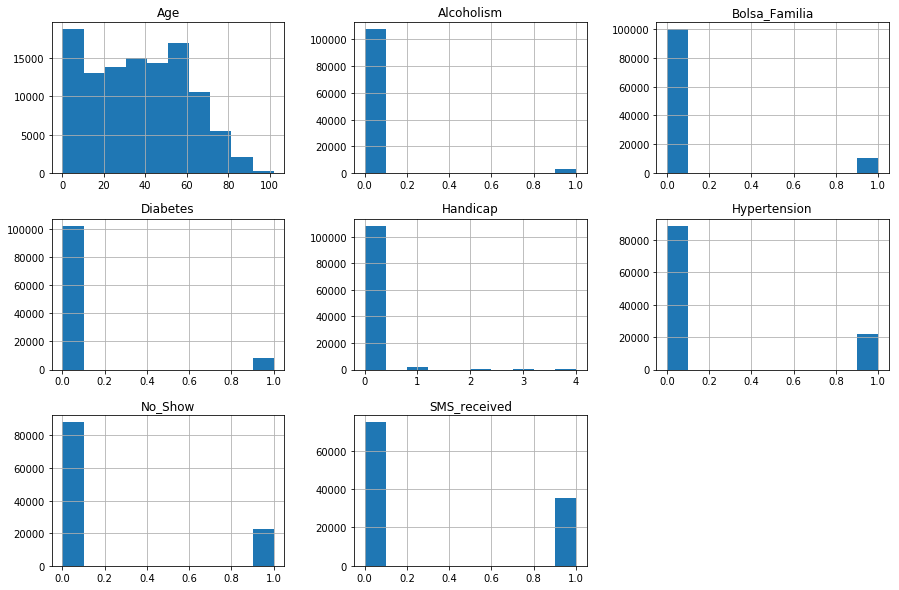

In [134]:
# Let us generate histograms of the data so we can visualize graphically for patterns

df.hist(figsize =(15,10));

As can be seen from the above histograms,
<li>The age across the population is uniformly distributed and tapers off after 60</li>
<li>There are very few people with reported alcoholism, diabetes or handicap other than 0, to make an impact on the No-Show statistic. We will not explore this further.</li>
<li>About 10% of the patients are enrolled in the Bolsa Familia, ~ 10,000</li>
<li>About 35% of the patients got SMS notifications regarding their scheduled appointment</li>

In [135]:
# Let us create masks for the datasets where patients showed up and did not show up for their appointments.

Show = df['No_Show'] == 0
NoShow = df['No_Show'] == 1

# What percentage of all patients are No-Shows?

df_Show = df[df['No_Show'] == 0]
df_NoShow = df[df['No_Show'] == 1]
df_Show.shape[0], df_NoShow.shape[0], df_NoShow.shape[0]/df.shape[0]


(88205, 22316, 0.2019163778829363)

<li>20% of all patients are "No-Shows" to their appointments</li>
<li>Let us see if gender has any role to play in the No-Shows</li>

### Question 1: Are men or women more likely to show or not show up for their appointments?

Are people more likely to not show-up if the hospital is in a certain location / Neighborhood?
Are patients enrolled in "Bolsa Família" more likely to not show-up?
Does the patient's Hypertention, Diabetes, Problem with Alcoholism or a Handicap prevent him from showing up?
Are customers more likely to show-up if they are reminded by a SMS message before their appointment?

In [136]:
Tot_FNS = df[df['Gender'] == 'F'][NoShow].shape[0]
Tot_F = df[df['Gender'] == 'F'].shape[0]
Perc_FNS = Tot_FNS/Tot_F
Tot_FNS, Tot_F, Perc_FNS

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(14591, 71834, 0.2031210847231116)

In [137]:
Tot_MNS = df[df['Gender'] == 'M'][NoShow].shape[0]
Tot_M = df[df['Gender'] == 'M'].shape[0]
Perc_MNS = Tot_MNS/Tot_M
Tot_MNS, Tot_M, Perc_MNS

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(7725, 38687, 0.19967947889471915)

<li>Turns out, the percentage of no-shows is 20% for both men and women, the same as that of the total population.</li>
<li>We can conclude that gender has no role to play in the no-shows</li>

### Question 2: Do younger / older people account for a large number of no-shows?

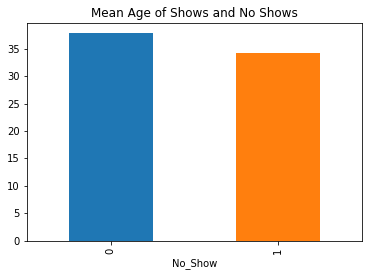

In [138]:
# Let us plot a bar chart to see the average age of patients who show up and do not show up.

df.groupby(['No_Show']).Age.mean().plot(kind='bar', title='Mean Age of Shows and No Shows');

<li>The average age of Shows and No-Shows across the entire dataset is close, though the No-Shows tend to be younger by a few years.</li>
<li>We may need to examine the data a little deeper to get more insights.</li>

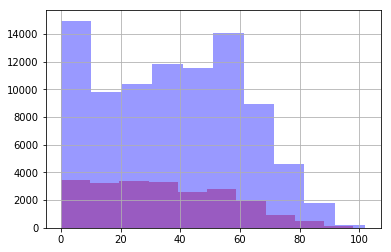

In [139]:
# Let us plot a histogram of Shows and No-Shows side by side, to compare the age distribution of patients

df.Age[NoShow].hist(alpha=0.4, color='Red', label='No-Show')
df.Age[Show].hist(alpha=0.4, color='Blue', label='Show');

<li>The histogram shows that patients who do not show up are distributed uniformly across different ages but the numbers sharply taper off after age 60. This could be because of lesser number of total older patients too.</li>
<li>Since the Age data is so dispersed, let us categorize Age into 3 groups and calculate the percentage of No-Shows for each age group.</li>
<li>The first age group is 0-39, the "Young" group</li>
<li>The second age group is 40-69, the "Mid" group</li>
<li>And the last age group is 70 and older, the "Old" group</li>
<li>Let us calculate the No-Show percentage for all these 3 age groups and compare</li>

In [140]:
Tot_NS_40 = df.query('Age < 40')[NoShow].shape[0]
Tot_40 = df.query('Age < 40').shape[0]
Perc_NS_40 = Tot_NS_40/Tot_40
Tot_NS_40, Tot_40, Perc_NS_40

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(13421, 59281, 0.22639631585162193)

In [141]:
Tot_NS_70 = df.query('Age >=40 and Age < 70')[NoShow].shape[0]
Tot_70 = df.query('Age >=40 and Age < 70').shape[0]
Perc_NS_70 = Tot_NS_70/Tot_70
Tot_NS_70, Tot_70, Perc_NS_70

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(7446, 41948, 0.1775054829789263)

In [142]:
Tot_NS_100 = df.query('Age >= 70')[NoShow].shape[0]
Tot_100 = df.query('Age >= 70').shape[0]
Perc_NS_100 = Tot_NS_100/Tot_100
Tot_NS_100, Tot_100, Perc_NS_100

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(1449, 9292, 0.15594059405940594)

<li>Turns out that age group 70 and older had a lower percentage of no-shows at 15.6%</li>
<li>This is consistent with our earlier observation that No-Shows taper off as people get older.</li>
<li>The younger group 0-39 has a slightly higher percentage of no-shows at 22.6%</li>

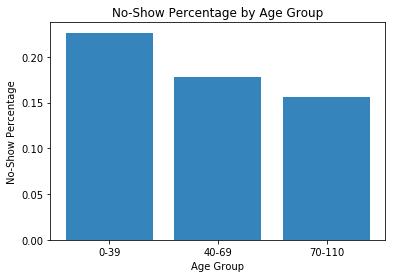

In [143]:
# Let us try to display the above observation graphically as well, in the from of a bar chart.

Y = [Perc_NS_40, Perc_NS_70, Perc_NS_100]
X = ['0-39', '40-69', '70-110']
x_pos = np.arange(len(X))
plt.bar(x_pos, Y, align='center', alpha=0.9)
plt.xticks(x_pos, X)
plt.xlabel('Age Group')
plt.ylabel('No-Show Percentage')
plt.title('No-Show Percentage by Age Group');

### Question 3: Let us now look at both Age and Gender as influencing variables

In [144]:
Tot_MNS_40 = df.query('Gender == "M" and Age < 40')[NoShow].shape[0]
Tot_M_40 = df.query('Gender == "M" and Age < 40').shape[0]
Perc_MNS_40 = Tot_MNS_40/Tot_M_40
Perc_MNS_40

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.22329313668355225

In [145]:
df.query('Gender == "M" and Age >= 40 and Age < 70')[NoShow].shape[0]/df.query('Gender == "M" and Age >= 40 and Age < 70').shape[0]

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.17037259615384615

In [146]:
df.query('Gender == "M" and Age > 70')[NoShow].shape[0]/df.query('Gender == "M" and Age > 70').shape[0]

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.15892160340546294

<li>We can observe that the combination of Gender (Male in this case) and Age Group yields a result no different than what we observed with just Age Group alone. Again, Gender does not seem to play a part in determining No-Shows</li>

### Question 4: Does receiving a SMS message result in more patients showing up?

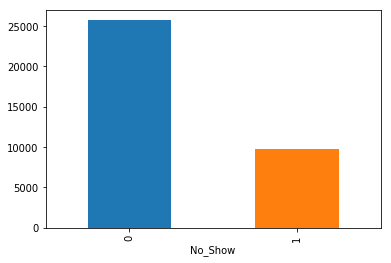

In [147]:
# Let us plot a bar chart of the number of people who show up and don't, once they receive a SMS message.

df_SMS = df[df['SMS_received'] == 1]
df_SMS.groupby(['No_Show'])['SMS_received'].sum().plot(kind='bar', label='Effect of SMS messages on Shows and No-Shows');

<li>It is clearly evident from the above chart that a substantially higher number of patients do show up for their appointments if they receive a SMS message.</li>
<li>25000+ patients who receive a SMS message show up for their appointment as against ~10,000 who do not.</li>

### Question 5: Does enrolling in Bolsa Familia have an effect on No-Shows?

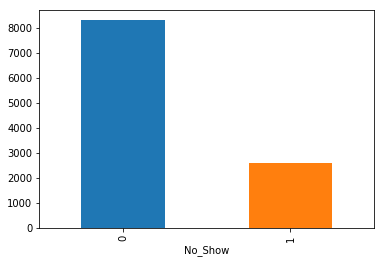

In [148]:
# Let us plot a bar chart of the number of people who are enrolled in Bolsa Familia but show up and do not show up.

df_Bolsa = df[df['Bolsa_Familia'] == 1]
df_Bolsa.groupby(['No_Show'])['Bolsa_Familia'].sum().plot(kind='bar', label="Effect of enrolling in Bolsa Familia");

<li>The chart suggests that substantially lower number of patients enrolling in Bolsa Familia do not show up. Most of the people enolled do show up.</li>

<a id='conclusions'></a>
## Conclusions

> Below are the findings of our investigation of the dataset.

<li>20% of all patients are "No-Shows" to their appointments.</li>
<li>Gender has no role to play in the no-shows.</li>
<li>The number of patients who do not show up are distributed uniformly across different ages but the numbers sharply taper off after age 60.</li>
<li>Age group 70 and older had a lower percentage of no-shows at 15.6%. The younger group 0-39 has a slightly higher percentage of no-shows at 22.6%</li>
<li>Substantially higher number of patients show up for their appointments if they receive a SMS message.</li>
<li>Substantially lower number of patients enrolling in Bolsa Familia do not show up. Most of the people enolled do show up.</li>